From "Best of 22Aug_Texas_Heated_RF_SVR_LR.ipynb"


"Saeed Bidi, May2023"

In [1]:
#CELL 2
# Importing the libraries
import numpy as np # for array operations
from numpy import mean
from numpy import std
from numpy import absolute

import pandas as pd # for working with DataFrames
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
import matplotlib.pylab as pylab
import os

from matplotlib import pyplot
import seaborn as sns
# from google.colab import files
# %matplotlib inline
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import PredictionError

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn import metrics
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [2]:
dataset = pd.read_csv('Data/Temperature_Data.csv')
#dataset = dataset[dataset['DNI (W/m2)'] >= 1]
X = dataset.iloc[:, 2:-2].values
y = dataset.iloc[:, -2].values
#y = y.reshape(len(y),1)

regressor = XGBRegressor()
regressor_name = "XGBRegressor"

#regressor = RandomForestRegressor()
#regressor_name = str(regressor)[:-2]

# regressor = LinearRegression()
# regressor_name = "LinearRegression"

#regressor = SVR(kernel = 'linear')
# regressor_name = "SVR"

# regressor = KNeighborsRegressor(n_neighbors=3)
# regressor_name = "KNeighborsRegressor"


In [4]:
#Feature Scaling
sc_X = StandardScaler()
#sc_y = StandardScaler()
X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)


In [5]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.25, random_state = 42)

In [6]:
#CELL 7
cv = KFold(n_splits=10, random_state=1, shuffle=True)
#X, y = make_regression(n_samples=200, n_features=1, n_informative=5, random_state=1)

regressor.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [7]:
report_path = os.path.join("Output", f'report_{regressor_name}.txt')
report_file = open(report_path, "w")

In [8]:
#CELL 8
ypred = regressor.predict(xtest)

score = regressor.score(xtrain, ytrain)

scores = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
mean(absolute(scores)), std(scores)

MAE = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)

report_file.write(f'MSE = {mse}, RMSE = {mse**(1/2.0)}, MAE = {MAE}, R-squared = {score}')
# print("MSE: ", mse)
# print("RMSE: ", mse**(1/2.0))
# print("MAE: ", MAE)
# print("R-squared:", score)

111

In [9]:
# X_unscaled = sc_X.inverse_transform(X)


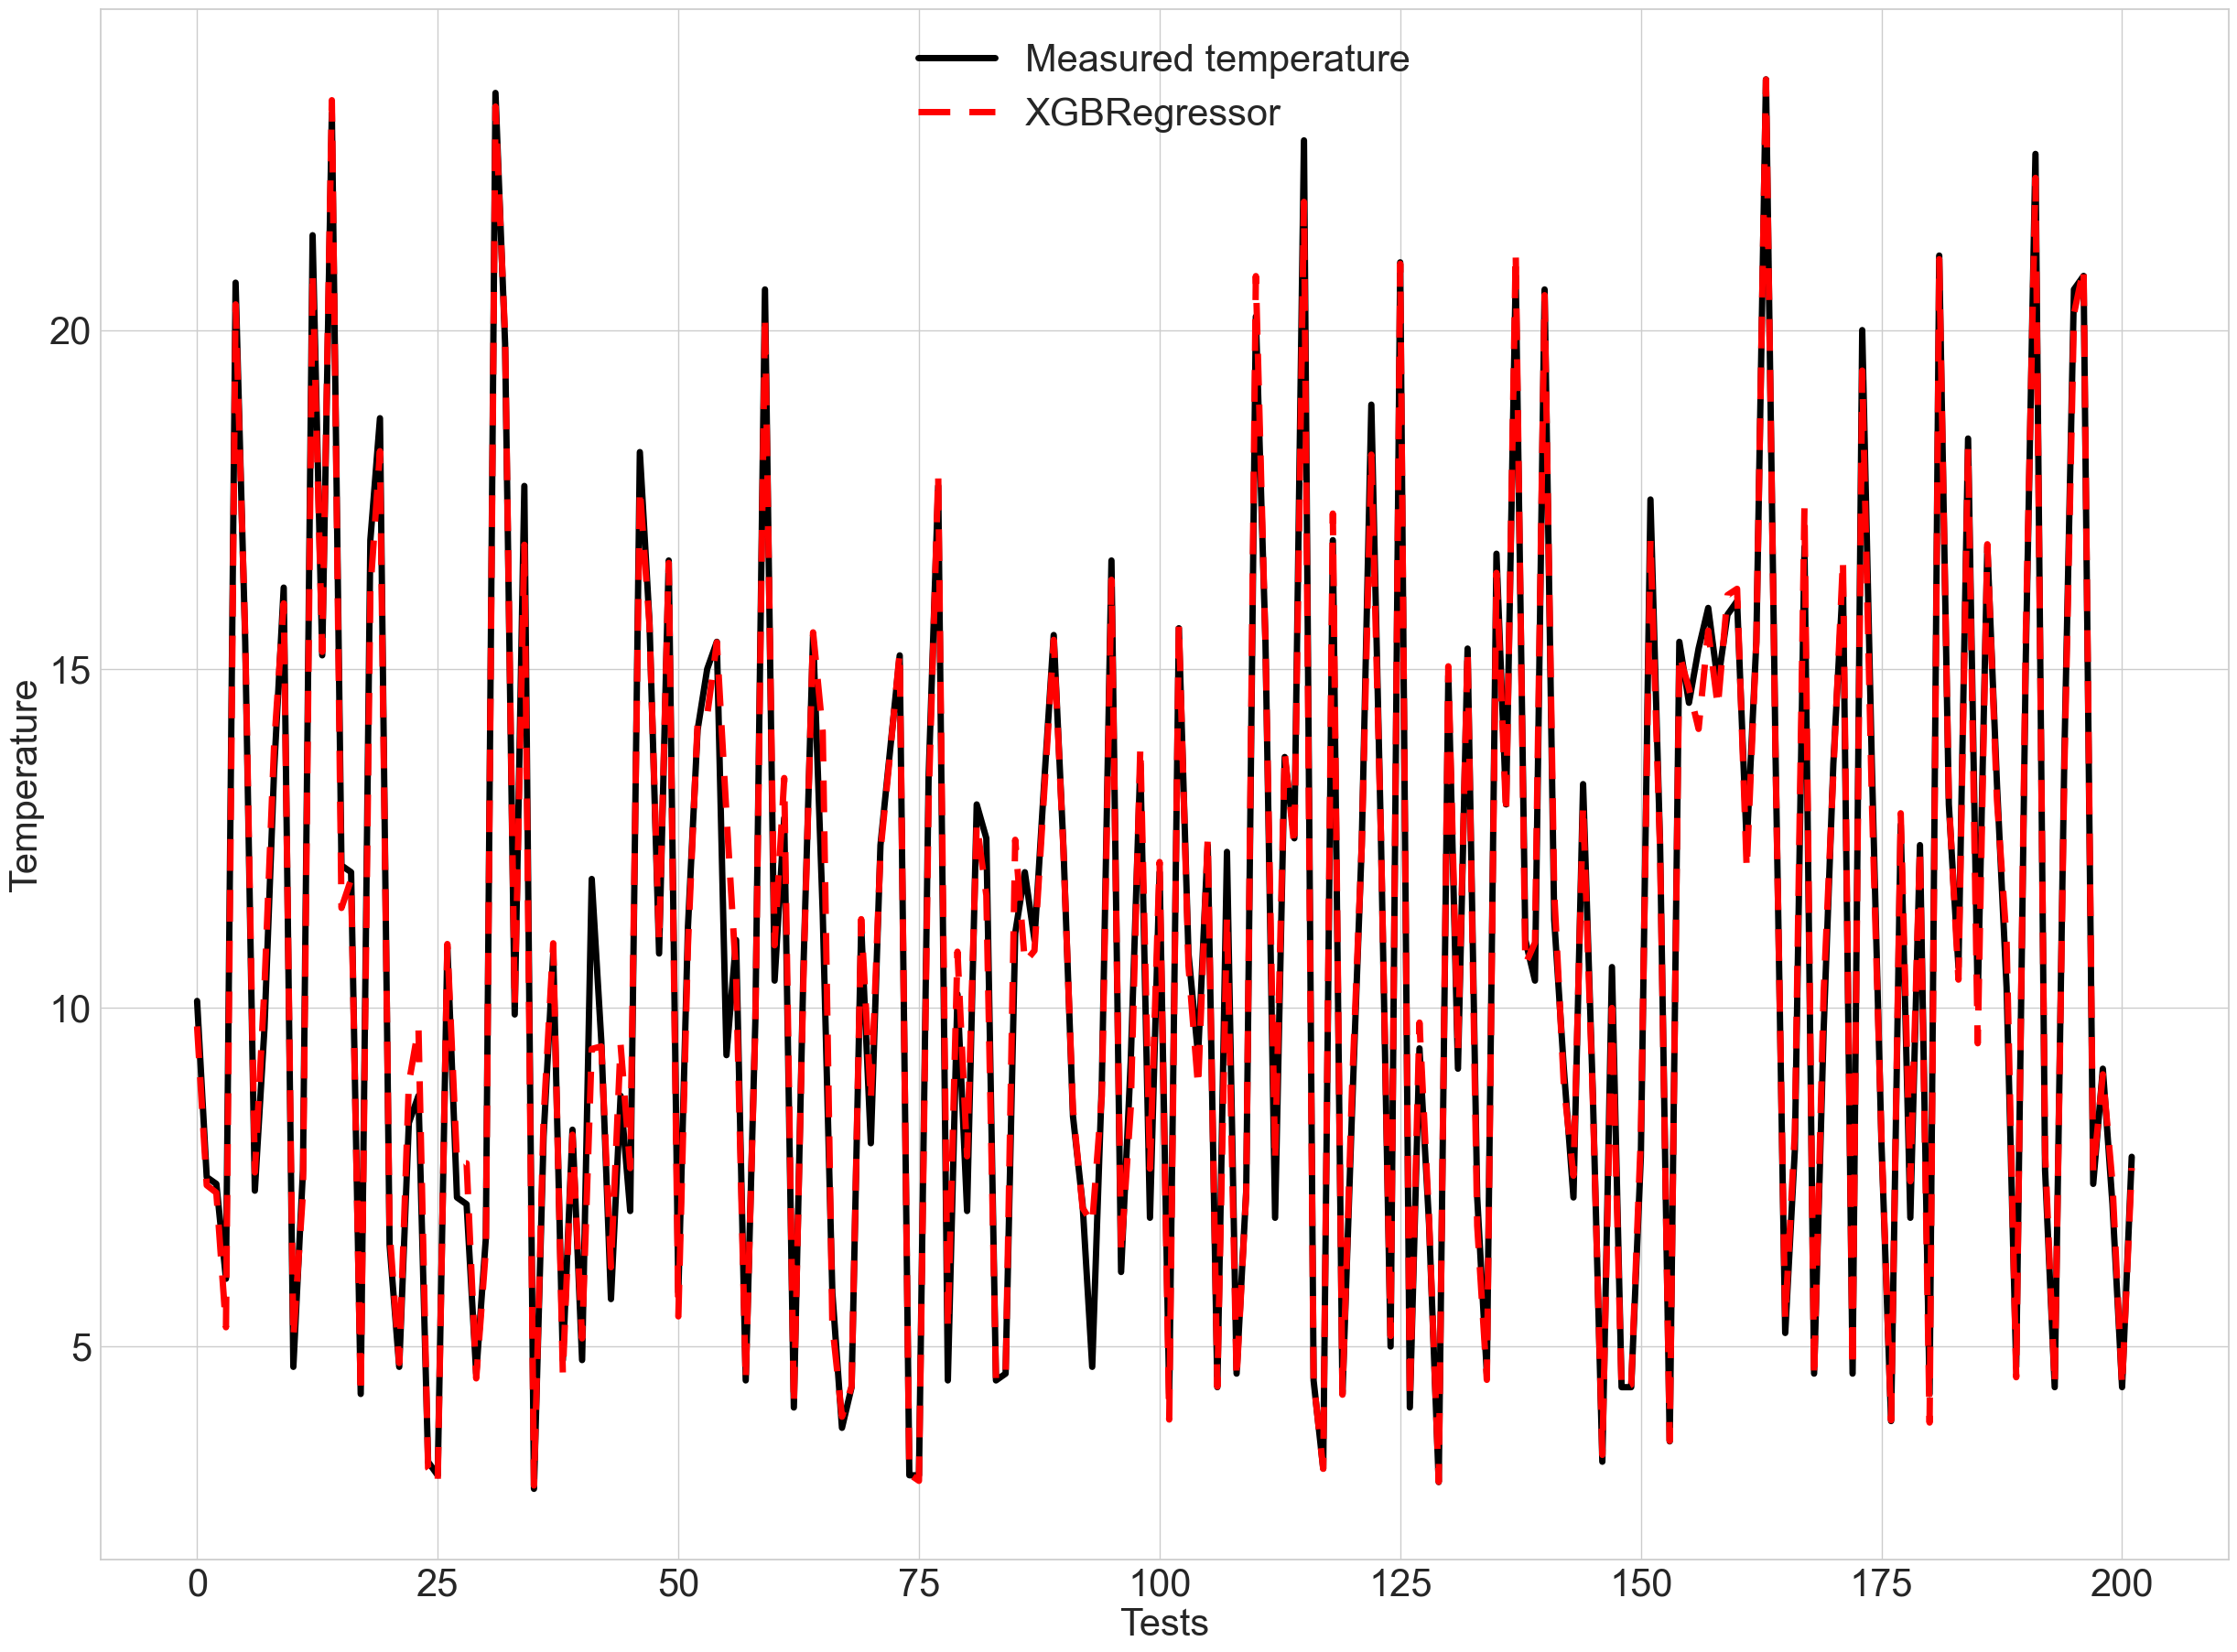

In [10]:
#CELL 9
size = 30
params = {'legend.fontsize': size,
          'figure.figsize': (15, 5),
         'axes.labelsize': size,
         'axes.titlesize':size,
         'xtick.labelsize':size,
         'ytick.labelsize':size}
pylab.rcParams.update(params)

x_ax = range(len(ytest))
plt.plot()
plt.plot(x_ax, ytest, linewidth=5, color = "black", label="Measured temperature")
plt.plot(x_ax, ypred, linewidth=5, color = "red", label=regressor_name, linestyle='dashed', dashes=(5, 3))
#plt.title("Measured and Predicted temperatures")
plt.xlabel('Tests')
plt.ylabel('Temperature')
plt.legend(loc='upper center',fancybox=True, shadow=True)
plt.grid(True)

fig = plt.gcf()
fig.set_size_inches(30, 22)
#fig.savefig('test2png.png', dpi=100)

plt.savefig(f'Output/temperature_{regressor_name}.png')
# files.download("temperature.png")

plt.show() 

In [11]:
print(regressor_name)

XGBRegressor


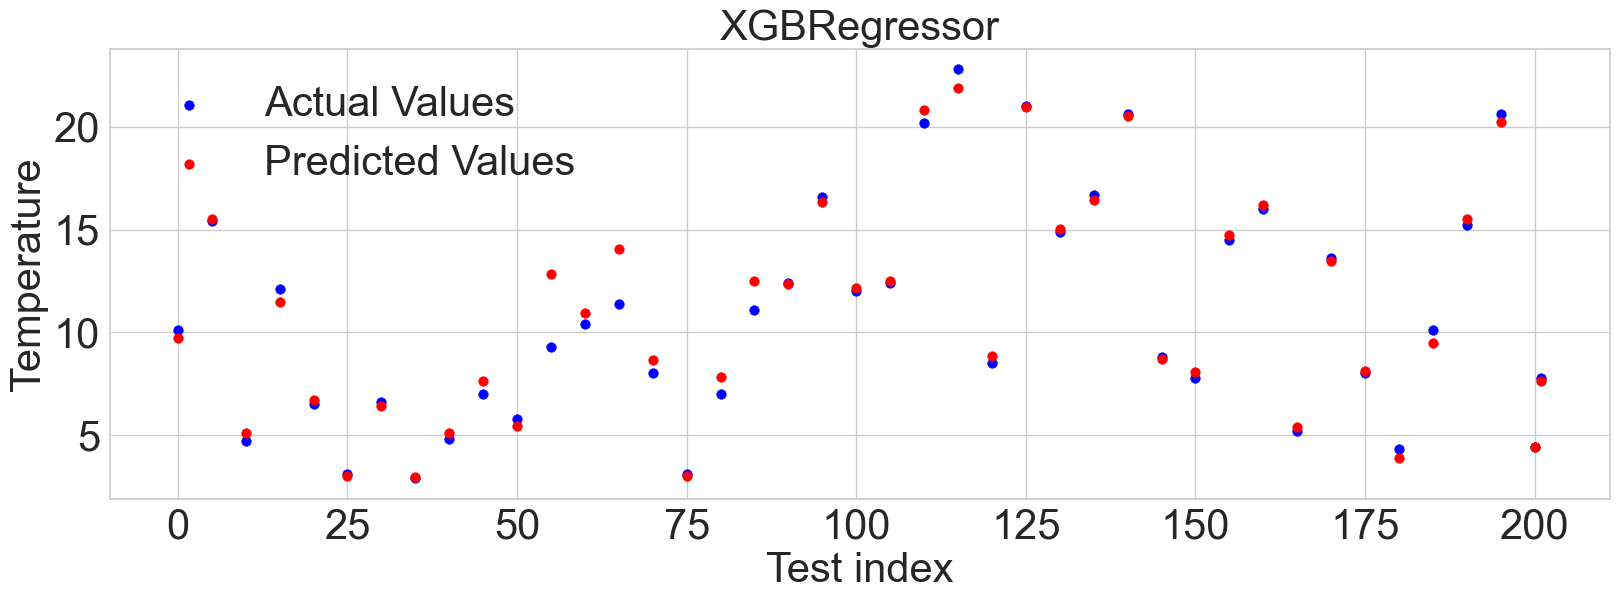

In [12]:
skip_indices = []
for i in range(201):
    if (i%5!=0):
        skip_indices.append(i)  # indices of points to skip

masktest = np.ones(len(ytest), dtype=bool)  # create boolean mask with True for all points
masktest[skip_indices] = False  # set the mask to False for the indices to skip

maskpred = np.ones(len(ytest), dtype=bool)  # create boolean mask with True for all points
maskpred[skip_indices] = False  # set the mask to False for the indices to skip

xtest1 = np.arange(len(ytest))  # create x-coordinates for the scatter points
xpred1 = np.arange(len(ytest))  # create x-coordinates for the scatter points

plt.scatter(np.array(xtest1)[masktest], np.array(ytest)[masktest], color='blue', label='Actual Values')
plt.scatter(np.array(xpred1)[maskpred], np.array(ypred)[maskpred], color='red', label='Predicted Values')
plt.title(regressor_name)
plt.ylabel('Temperature')
plt.xlabel('Test index')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(10, 10)
# fig.set_size_inches(30, 22)

plt.subplots_adjust(left=0.5, right=2, top=0.95, bottom=0.5)

fig.savefig(f'Output/Scatter with {regressor_name}.png',dpi=100,bbox_inches = 'tight', pad_inches=0.5)

plt.show()

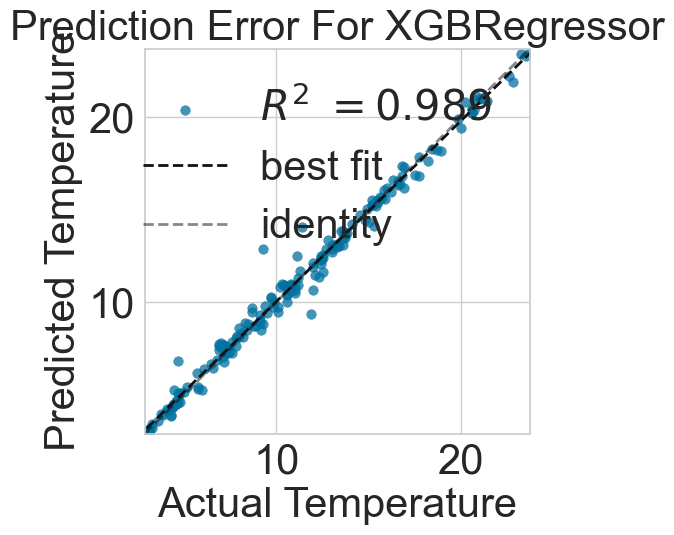

In [13]:
#https://www.scikit-yb.org/en/latest/matplotlib.
#https://www.scikit-yb.org/en/latest/faq.html


#regressor = XGBRegressor()
# regressor = RandomForestRegressor()
#regressor = LinearRegression()
#regressor = SVR(kernel = 'linear')
#regressor = KNeighborsRegressor(n_neighbors=3)
# Fit the visualizer
model = PredictionError(regressor)
model.fit(xtrain, ytrain)
model.score(xtest, ytest)



# Call finalize to draw the final yellowbrick-specific elements
model.finalize()

# Get access to the axes object and modify labels
size = 30

model.ax.set_xlabel("Actual Temperature",fontsize=size)
model.ax.set_ylabel("Predicted Temperature",fontsize=size)
model.ax.legend(fontsize=size)
model.ax.tick_params(axis="x", labelsize=size)
model.ax.tick_params(axis="y", labelsize=size)
plt.title(f'Prediction Error For {regressor_name}', fontsize=size)
plt.savefig(f'Output/PredictionError with {regressor_name}.png')
# files.download("RandomForestRegressor.png")

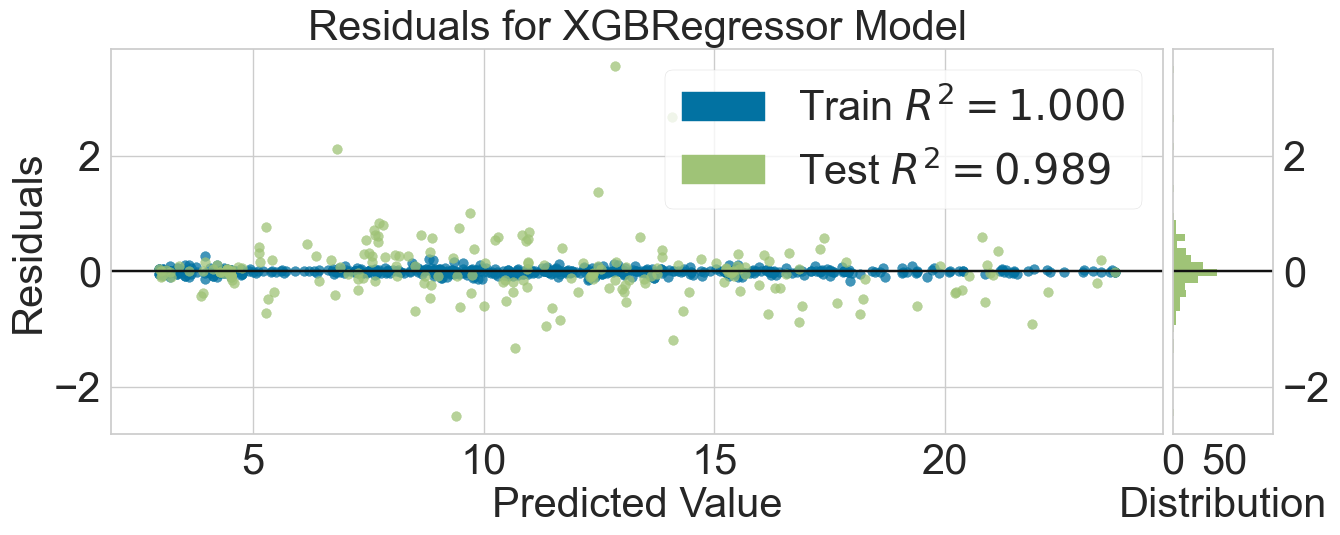

In [14]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(regressor)

visualizer.fit(xtrain, ytrain)  # Fit the training data to the visualizer
visualizer.score(xtest, ytest)  # Evaluate the model on the test data

plt.title(f'Residuals for {regressor_name}', fontsize=size)
plt.savefig(f'Output/Residuals with {regressor_name}.png')
visualizer.show()

report_file.close()

Feature: 0, Score: 0.01182
Feature: 1, Score: 0.28325
Feature: 2, Score: 0.05608
Feature: 3, Score: 0.17989
Feature: 4, Score: 0.46895
Feature: 5, Score: 0.00000


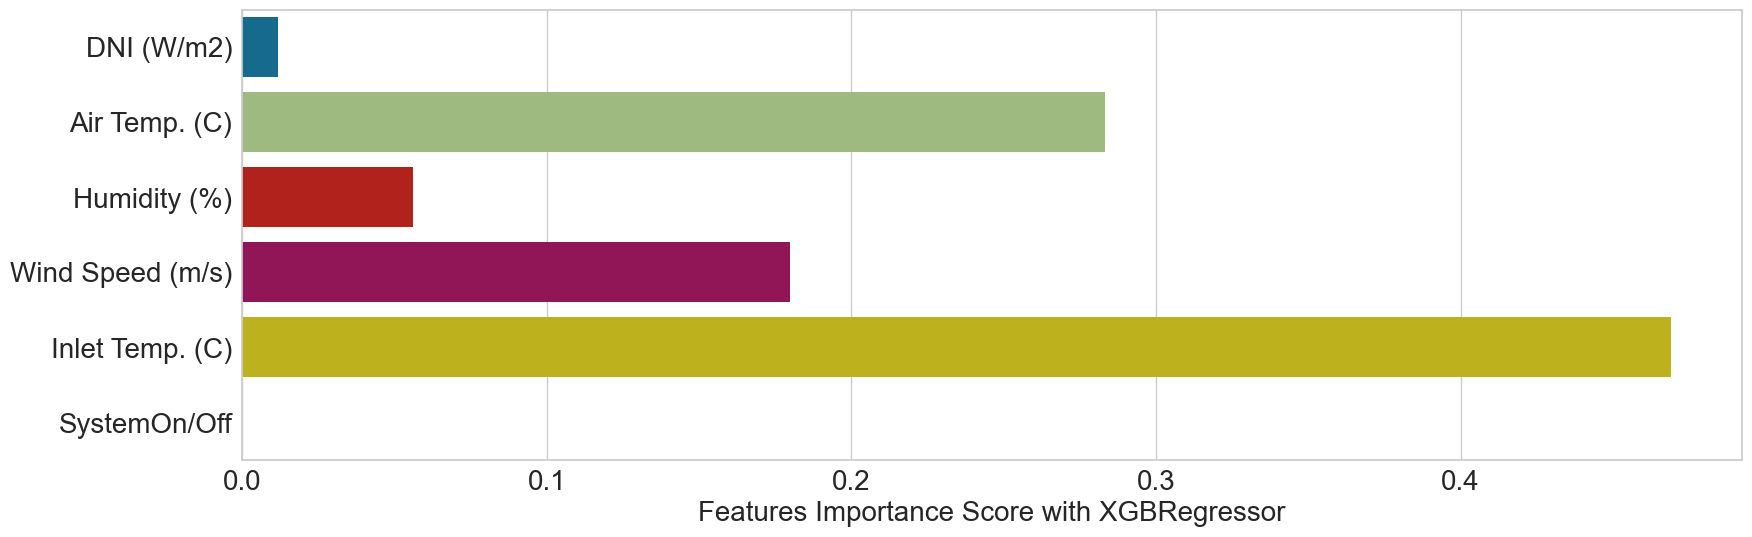

In [15]:
#CELL 10
size = 20
params = {'legend.fontsize': size,
          'figure.figsize': (10, 10),
         'axes.labelsize': size,
         'axes.titlesize':size,
         'xtick.labelsize':size,
         'ytick.labelsize':size}
pylab.rcParams.update(params)


importance = regressor.feature_importances_
features = ['DNI (W/m2)','Air Temp. (C)','Humidity (%)','Wind Speed (m/s)','Inlet Temp. (C)','SystemOn/Off']
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
sns.barplot(y=features, x=importance)
plt.xlabel(f'Features Importance Score with {regressor_name}')
#plt.ylabel('Feature')
#plt.title("Visualising Important Features (Heated zone)")

fig = plt.gcf()
fig.set_size_inches(10, 10)
# fig.set_size_inches(30, 22)

plt.subplots_adjust(left=0.5, right=2, top=0.95, bottom=0.5)

fig.savefig(f'Output/Feature importance with {regressor_name}.png',dpi=100,bbox_inches = 'tight', pad_inches=0.5)

#plt.savefig(f'Output/feature importance with {regressor_name}.png', dpi=500)

#fig.savefig('test2png.png', dpi=100)

# files.download("featureImportance.png")
pyplot.show()

In [16]:
# import tensorflow as tf

# from tensorflow import keras
# # from tensorflow.keras import layers

# print(tf.__version__)

In [17]:
# # dataset_full = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Temperature_Texas/Temperature_Data.csv")
# dataset_full = pd.read_csv('Temperature_Data.csv')

# dataset = dataset_full.iloc[:, 2:]
# train_dataset = dataset.sample(frac=0.8, random_state=0)
# test_dataset = dataset.drop(train_dataset.index)

In [18]:
# train_dataset.describe().transpose()[['mean', 'std']]